___
<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 


# TERCER EXAMEN PARCIAL
# SIMULACIÓN DE PROCESOS FINANCIEROS

## Nombre: Diego Alberto López Lazareno

## Fecha: 28 de noviembre del 2021

## Por: Oscar David Jaramillo Z.

# 1
Vamos a suponer que el curso de simulación de procesos financieros es una gran empresa de consultoría financiera que ofrece sus servicios a cualquier tipo de compañía o particular. Supongamos que acuden a nuestra empresa 4 personalidades con los siguientes problemas que desean solucionar:
> 1. El primer cliente, es un granjero que cultiva maíz y desea realizar una estrategia de cobertura que le permita prever las fluctuaciones en el precio de sus cultivos para el invierno entrante, en donde el pueda minimizar las pérdidas y maximizar las ganancias. 
> 2. La segunda empresa, es una empresa que construye productos en aluminio que tiene 1 año de estar ejerciendo en este tipo mercado. El gerente desea crear un plan de acción para expandir la empresa realizando estrategias financieras que le permitan maximizar sus ganancias y de esta forma cumplir con el objetivo planteado.
> 3. El tercer cliente, es una empresa joyera que fabrica sus piezas en oro. Esta empresa ha visto afectado sus ingresos debido a las fluctuaciones que ha presentado los últimos meses el precio del oro. Debido a esto, acude a nosotros para intentar mitigar estas fluctuaciones en el precio del oro, usando una adecuada estrategia financiera.
> 4. Nuestro último cliente, es la empresa mexicana PEMEX, que desea ejecutar ciertas estrategias financieras, que les permita cubrirse ante posibles caídas en el precio del barril del petróleo. Su objetivo en maximizar sus ganancias y minimizar las pérdidas de la compañía usando la mejor estrategia financiera (costo-beneficio).

Para cada uno de los clientes, se debe de presentar 3 posibles estrategias de cobertura usando opciones Europeas, Asiáticas y barrera tipo call ó put. Además de ofrecer al cliente este abanico de posibilidades, ustedes como analistas financieros deben de recomendar la mejor estrategia costo-beneficio (basado en sus cálculos), que debería cada empresa tomar, para cumplir con su objetivo. Recuerden, pueden asumir diversos escenarios donde con la valuación realizada para cada una de sus opciones, puedan ustedes dar un estimado monetario en dos posibles escenarios. Por ejemplo, si pueden ejercer la opción entonces el cliente además de vender o comprar sus productos obtendrá una cantidad X de ganancias adicionales o en lugar de perder un 50% de los ingresos en sus ventas, el empresario puede perder sólo el 10% de los ingresos de sus ventas, por mencionar un posible escenario. Por el contrario, en el caso que no ejerza su opción el cliente tendrá una pérdida de la prima de la cantidad de opciones compradas (pero recalcando que el empresario puede estar cubierto ante diversas situaciones). La calificación será basada en el análisis que realicen y propongan a cada cliente usando los resultados de sus valuaciones.

**Para la valuación de opciones europeas debes de comparar tu valuación usando montecarlo con el valor teórico dado por el modelo de Black and Scholes dado en clase y concluir,**

> ###  Criterio de evaluación
> - Se te calificará de acuerdo a los resultados finales que reportes, basados en tu análisis.
> - **Ejercicio 1**: 40% La valuación de cada tipo de opción corresponderá al 40% de todo este examen.
> - **Ejercicio 2**: 60%. El restante 60% corresponderá a la decisión o recomendación basado en sus análisis que le recomendarán a cada compañía.

> ### Entrega
> Se debe de entregar un cuaderno de python donde se reporten todos los cálculos empleados en su análisis. La fecha límite de entrega será el martes 7 de diciembre a las 5 pm y se expondrá ese mismo día los resultados obtenidos.

> ### Suposiciones 
> - Deben de definirse correctamente el nombre de las acciones a descargar de Yahoo según la empresa asignada.
> - El examen es individual y códigos idénticos serán penalizados.


In [1]:
## ------------------------------------------- Librerías necesarias ------------------------------------------- ##
# Manejo de datos y análisis numérico
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
%matplotlib inline

# Yfinance
import yfinance as yf

# Manejo del tiempo
import time
import datetime 

# Facebook's prophet
from fbprophet import Prophet

# Estadística
from scipy import stats as st

# Filtrado de alertas 
import warnings
warnings.filterwarnings("ignore")

## ------------------------------------------- Funciones necesarias ------------------------------------------- ##
def commoditiesPricesYfinance(ticker : "Símbolo de cotización del commodity"):
    """
    commoditiesPricesYfinance retorna un DataFrame, historicalPrices, con el precio de cierre ajustado para la materia prima
    en cuestión. La descarga de datos se hace con ayuda de la paquetería de yfinance.
    
    *ticker : símbolo de cotización del commodity (para yfinance).
    
    """
    
    historicalPrices = yf.download(ticker, progress = False)
    
    return historicalPrices

def commoditiesPricesVisualization(data : "Serie temporal", title : "Título", ticker : "Símbolo de cotización", 
                                   color : "Color", 
                                   hlines1 : "Soportes y resistencias (1)", hlines2 : "Soportes y resistencias (2)"):
    """
    commoditiesPricesVisualization retorna un visual del precio de cierre ajustado para la materia prima en cuestión.
    
    *data : es la serie temporal (precio de cierre ajustado) de la materia prima.
    *title : es el título del visual.
    *ticker : es el símbolo de cotización de la materia prima.
    *color : es el color del gráfico.
    *hlines1 : son los soportes o resistencias.
    *hlines2 : son los soportes o resistencias.
    
    """
    
    start = datetime.datetime.today() - datetime.timedelta(365 * 3)
    data = data[data.index >= start]

    plt.figure(figsize = (15, 5))
    plt.title("Precios de Cierre Ajustado: " + title)
    plt.plot(data["Adj Close"], color = color[0], label = ticker)
    [plt.fill_between(data.index, line1, line2, color = color[1], alpha = 0.35) for line1, line2 in zip(hlines1, hlines2)];
    plt.xlabel("Fecha")
    plt.ylabel("USD")
    plt.legend(loc = "best")
    plt.grid()
    
    return data
    
def TimeSeriesPrediction(data : "Serie temporal", title : "Título", label : "Etiqueta", 
                         xlabel : "Etiqueta eje X", ylabel : "Etiqueta eje Y", color : "Color", 
                         periods : "Número de pasos para el pronóstico"):
    """
    TimeSeriesPrediction elabora una predicción para la serie temporal ingresada con el algoritmo Prophet de Facebook.
    
    *data : es la serie temporal.
    *title : es el título del visual.
    *label : es la etiqueta del visual.
    *xlabel : es la etiqueta del eje X del visual.
    *ylabel : es la etiqueta del eje Y del visual.
    *color : es el color del visual.
    *periods : es el número de pasos a pronosticar.
    
    """
    
    train_dataset = pd.DataFrame()
    train_dataset["ds"] = pd.to_datetime(data.index, format = "%Y")
    train_dataset["y"] = data.values
    prophet_basic = Prophet()
    prophet_basic.fit(train_dataset)
    
    future = prophet_basic.make_future_dataframe(periods = periods)
    forecast = prophet_basic.predict(future)
    forecast = forecast.loc[len(train_dataset):, ["yhat", "yhat_lower", "yhat_upper"]]
    newIndex = [int(data.index[-1]) + i for i in range(1, periods + 1)]
    forecast.index = newIndex
    
    plt.figure(figsize = (15, 5))
    plt.title(title)
    plt.plot(data, label = label, color = color[0])
    plt.plot(forecast["yhat"], "--", label = "Predicciones", color = color[0])
    plt.plot(forecast["yhat_lower"], "--", label = "Límite inferior", color = color[1])
    plt.plot(forecast["yhat_upper"], "--", label = "Límite superior", color = color[1])
    plt.legend(loc = "best")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid()
    
    return forecast
    

## Cliente 1

> El primer cliente, es un granjero que cultiva maíz y desea realizar una estrategia de cobertura que le permita prever las fluctuaciones en el precio de sus cultivos para el invierno entrante, en donde el pueda minimizar las pérdidas y maximizar las ganancias. 

### Recomendación

En este caso **tenemos a un granjero que desea protegerse ante las fluctuaciones del precio del maíz para asegurar los ingresos de su cosecha**. Es lógico que el cliente busca vender su cosecha a un precio pactado, por lo que **le recomendamos una posición larga en una opción del tipo put**, la cual le permitirá vender su maíz a un precio determinado en un tiempo futuro. Con esto el granjero podrá estar tranquilo ante posibles caídas en el precio del maíz, pues el contrató una opción donde ha pactado un precio de venta para su cultivo. Es importante hacerle notar que este contrato financiero tiene un costo, lo que se conoce como la prima, por lo que, en dado caso que no ejercerlo (el contrato) se perderá dicha prima.

### Supuestos

1. El granjero es de nacionalidad estadounidense. 
2. Se contrata la opción financiera para protegerse ante una posible caída del precio del maíz en la temporada de invierno del año entrante (el vencimiento de la opción es a finales de diciembre del $2022$).
3. El granjero desconoce los bushels (fanegas) que darán sus hectáreas durante la cosecha, que se lleva a cabo usualmente entre los meses de septiembre y noviembre. Además, posee $500$ acres de cultivo.
4. Cada contrato u opción se firma por $5,000$ bushels (cada bushel pesa $25$ kg. aproximadamente). Esto según los contratos estandarizados del CME (Chicago Mercantile Exchange).
5. Se decargan los precios del símbolo de cotización **ZC=F**, el cual corresponde al futuro de maíz.

### Referencias consultadas

+ https://quickstats.nass.usda.gov/#73EB5B6B-6010-3651-8EFD-A15811AD0ADA
+ https://www.nass.usda.gov/Charts_and_Maps/Field_Crops/cornyld.php
+ https://www.google.com.mx/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwilpcqN-8X0AhWXlmoFHUI5CRgQFnoECC0QAQ&url=https%3A%2F%2Fwww.agry.purdue.edu%2Fext%2Fcorn%2Fnews%2Ftimeless%2Fyieldtrends.html&usg=AOvVaw1aO6fzKtXBTfJm_2sDZ69w
+ https://blog.machinefinder.com/16114/a-visual-look-at-typical-united-states-corn-harvest-dates
+ https://www.cmegroup.com/markets/agriculture/grains/corn.html

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,Predicciones (Bushels per Acre),Límite inferior,Límite superior
2022,182.454748,168.205410,196.288351
2023,186.515923,172.858139,200.242778
2024,189.464165,176.334981,203.336489
2025,191.222536,176.545441,205.039015
2026,191.738990,178.050800,206.031829


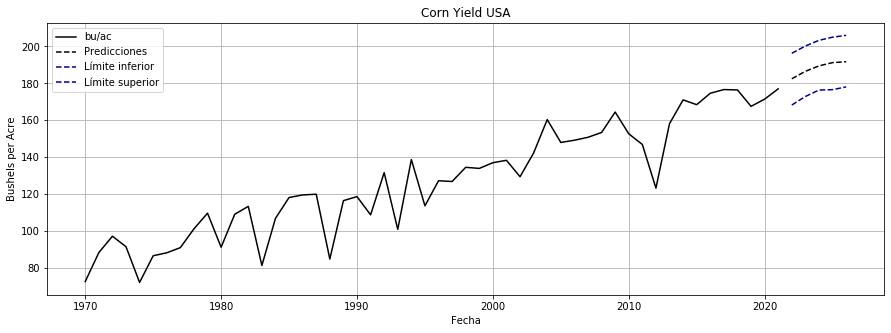

In [2]:
cornYield = pd.read_csv("Data/CornYieldUSA.csv")[["Year", "Value"]][::-1].set_index(["Year"])
predictions = TimeSeriesPrediction(cornYield[cornYield.index >= 1970], "Corn Yield USA", "bu/ac", "Fecha", 
                                   "Bushels per Acre", ["k", "darkblue"], 5)
predictions.columns = ["Predicciones (Bushels per Acre)", "Límite inferior", "Límite superior"]
predictions

In [3]:
acres = 510
harvestPred = acres * np.round(predictions)
harvestPred.columns = ["Bushels totales", "Límite inferior", "Límite superior"]
harvestPred

,Bushels totales,Límite inferior,Límite superior
2022,92820.0,85680.0,99960.0
2023,95370.0,88230.0,102000.0
2024,96390.0,89760.0,103530.0
2025,97410.0,90270.0,104550.0
2026,97920.0,90780.0,105060.0


+ Como habíamos mencionado nuestro cliente es un granjero estadounidense que busca contratar opciones del tipo put para asegurar el precio al que venderá la cosecha de maíz del año entrante. En este caso nuestro cliente posee $510$ acres (el acre es una medida de superficie usada en la agricultura, que equivale entre $0.40$ y $0.5$ héctareas), aproximadamente $204$ hectáreas de cultivo. Sin embargo, éste desconoce la producción del año entrante. Es por esto que tomamos la serie temporal conocida como `Corn Yield` de los Estados Unidos, donde se nos muestran los históricos de bushels de maíz obtenidos por acre desde la década de los $70's$. Con esta serie temporal hacemos pronósticos con ayuda de la librería `Prophet` de Facebook y llegamos a que la producción media en los Estados Unidos para el año entrante, es decir, el $2022$, será de $182.45$ bushels por cada acre de cultivo. También tenemos límites inferiores y superiores para cada pronóstico, aunque tomaremos el pronóstico medio de $182$ fanegas por acre, lo que conlleva a que nuestro cliente cosechará (entre los meses de septiembre y noviembre del año entrante) un total de $92,820$ bushels. El calculo se elabora como se muestra a continuación:

$$ \frac{182 \space bushels}{acre} * 500 \space acres = 92,820 \space bushels $$


Último precio de cotización: 577.0


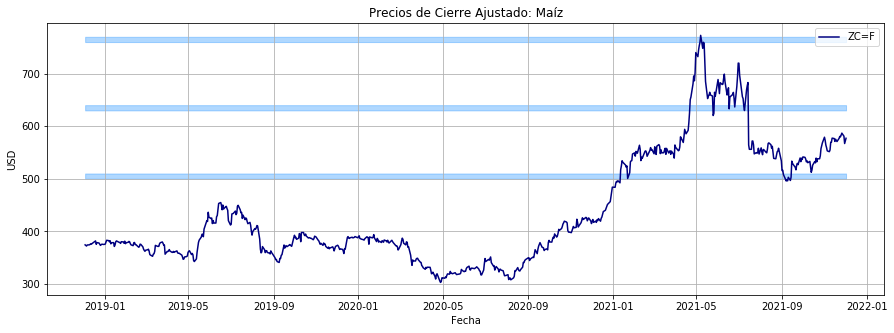

In [4]:
ticker1 = "ZC=F"
data1 = commoditiesPricesYfinance(ticker1)
data1 = commoditiesPricesVisualization(data1, "Maíz", ticker1, ["navy", "dodgerblue"], [500, 630, 760], [510, 640, 770])
print("Último precio de cotización: " + str(data1["Adj Close"].iloc[-1]))

+ Podemos observar la serie temporal del precio de cierre ajustado (en dólares) para el commodity maíz. A manera de agregado se grafican algunos niveles de soportes y resistencias que ha tenido el precio. Podemos observar que la cotización actual es de $577 \space USD$. En el peor de los escenarios, si se desploma el precio, este caería al nivel de soporte que se encuentra alrededor de los $500 \space USD$. En el mejor de los escenarios el precio puede llegar a la resistencia situada entre los $630 \space USD$ y, si tiene suficiente volumen, podría romperla para tocar el máximo histórico de mediados del presente año.

In [6]:
def valuation(data, K, expirationDate, rf, N, optionType):
    """
    valuation
    
    """
    S0 = data.iloc[-1]
    returns = np.log(data / data.shift(1)).dropna()
    sigma = returns.std()
    
    dates = pd.date_range(start = datetime.date.today(), end = expirationDate, freq = "B")
    days = len(dates)
    Z = np.random.randn(days, N)
    returnsSimulation = pd.DataFrame(sigma * Z + rf, index = dates)
    pricesSimulation = S0 * np.exp(returnsSimulation.cumsum())
    pricesSimulation.iloc[0, :] = S0
    
    if optionType == "Call":
        valuation_ = pd.DataFrame(index = ["Call B&S", "Call Europeo", "Call Asiático R.", "Call Asiático T.", "Call Barrera"],
                             columns = ["Prima", "Límite inferior", "Límite superior"])
        
        # Black and Scholes Call Europeo
        d1 = (np.log(S0 / K) + (rf + 0.5 * sigma ** 2) * days) / (sigma * np.sqrt(days))
        d2 = (np.log(S0 / K) + (rf - 0.5 * sigma ** 2) * days) / (sigma * np.sqrt(days))
        call1 = S0 * st.norm.cdf(d1) - K * np.exp(-rf * days) * st.norm.cdf(d2)
        valuation_.loc["Call B&S", :] = [call1 for i in range(3)]
        
        # Call Europeo
        call2 = np.exp(-rf * days) * np.fmax(pricesSimulation - K, 0).mean(axis = 1)
        i2 = st.norm.interval(0.99, loc = call2.iloc[-1], scale = st.sem(pricesSimulation.iloc[-1]))
        valuation_.loc["Call Europeo", :] = [call2.iloc[-1], i2[0], i2[1]]
        
    else:
        valuation_ = pd.DataFrame(index = ["Put B&S", "Put Europeo", "Put Asiático R.", "Put Asiático T.", "Put Barrera"],
                             columns = ["Prima", "Límite inferior", "Límite superior"])
        
        # Black and Scholes Put Europeo
        d1 = (np.log(S0 / K) + (rf + 0.5 * sigma ** 2) * days) / (sigma * np.sqrt(days))
        d2 = (np.log(S0 / K) + (rf - 0.5 * sigma ** 2) * days) / (sigma * np.sqrt(days))
        put1 = K * np.exp(-rf * days) * st.norm.cdf(-d2) - S0 * st.norm.cdf(-d1)  
        
        valuation_.loc["Put B&S", :] = [put1 for i in range(3)]
        
        # Put Europeo
        put2 = np.exp(-rf * days) * np.fmax(K - pricesSimulation, 0).mean(axis = 1)
        i2 = st.norm.interval(0.99, loc = put2.iloc[-1], scale = st.sem(pricesSimulation.iloc[-1]))
        valuation_.loc["Put Europeo", :] = [put2.iloc[-1], i2[0], i2[1]]
        
    return valuation_

rf = 0.27 / 100 / 360
valuation(data1["Adj Close"], 560, "2022-12-31", rf, 10000, "Put")

,Prima,Límite inferior,Límite superior
Put B&S,59.1381,59.1381,59.1381
Put Europeo,48.8446,44.0035,53.6857
Put Asiático R.,NaN,NaN,NaN
Put Asiático T.,NaN,NaN,NaN
Put Barrera,NaN,NaN,NaN


In [12]:
282 / 252

1.119047619047619

## Cliente 2 

> La segunda empresa, es una empresa que construye productos en aluminio que tiene 1 año de estar ejerciendo en este tipo mercado. El gerente desea crear un plan de acción para expandir la empresa realizando estrategias financieras que le permitan maximizar sus ganancias y de esta forma cumplir con el objetivo planteado.

### Interpretación


### Supuestos



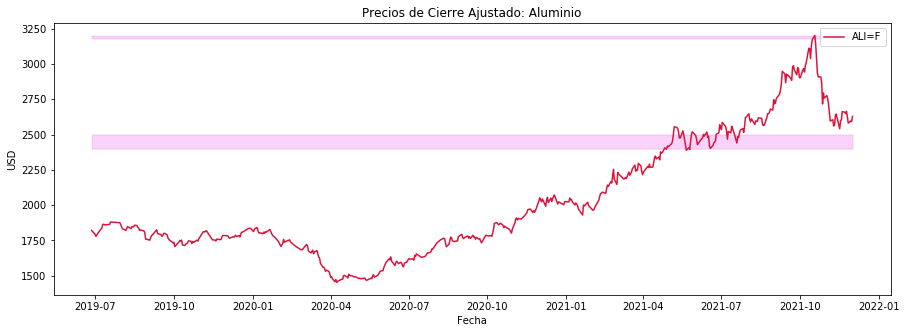

In [3]:
ticker2 = "ALI=F"
data2 = commoditiesPricesYfinance(ticker2)
commoditiesPricesVisualization(data2, "Aluminio", ticker2, ["crimson", "violet"], [2400, 3180], [2500, 3200])

## Cliente 3

> El tercer cliente, es una empresa joyera que fabrica sus piezas en oro. Esta empresa ha visto afectado sus ingresos debido a las fluctuaciones que ha presentado los últimos meses el precio del oro. Debido a esto, acude a nosotros para intentar mitigar estas fluctuaciones en el precio del oro, usando una adecuada estrategia financiera.

### Interpretación


### Supuestos



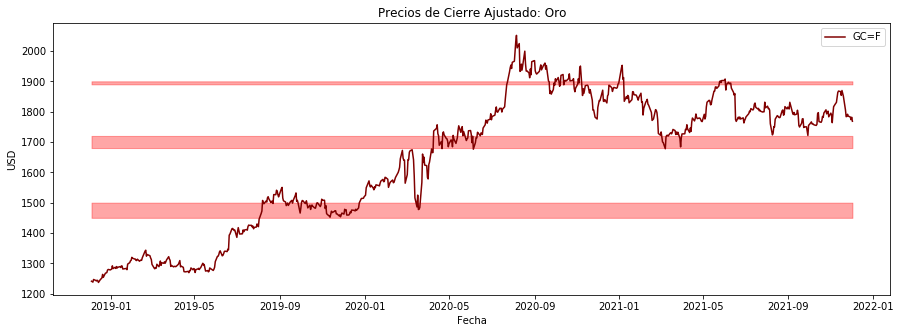

In [4]:
ticker3 = "GC=F"
data3 = commoditiesPricesYfinance(ticker3)
commoditiesPricesVisualization(data3, "Oro", ticker3, ["maroon", "red"], [1680, 1450, 1890], [1720, 1500, 1900])

## Cliente 4

> Nuestro último cliente, es la empresa mexicana PEMEX, que desea ejecutar ciertas estrategias financieras, que les permita cubrirse ante posibles caídas en el precio del barril del petróleo. Su objetivo en maximizar sus ganancias y minimizar las pérdidas de la compañía usando la mejor estrategia financiera (costo-beneficio).

### Interpretación


### Supuestos



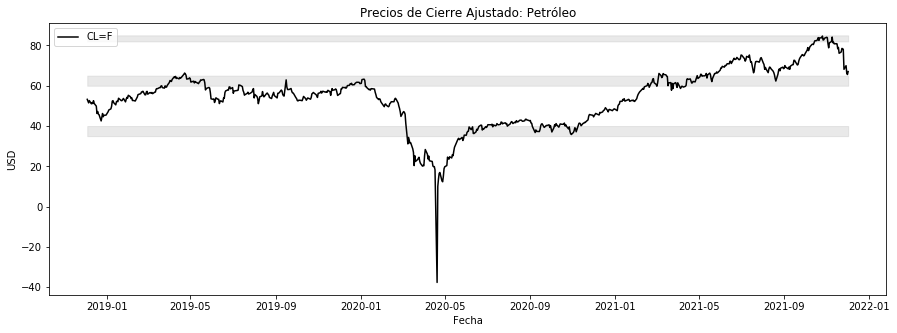

In [5]:
ticker4 = "CL=F"
data4 = commoditiesPricesYfinance(ticker4)
commoditiesPricesVisualization(data4, "Petróleo", ticker4, ["k", "silver"], [60, 35, 82], [65, 40, 85])

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Oscar David Jaramillo Zuluaga.
</footer>